In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.set_option('display.max_colwidth', None)

In [51]:
df = pd.read_csv(('/content/drive/MyDrive/train.txt'), sep=",", skiprows=[0,1], names=['Bytes','Time'])
df

,Bytes,Time
0,3734185,0.298548
1,5839301,0.460480
2,6343427,0.527977
3,1355574,0.098012
4,725488,0.048238
...,...,...
71108,4472112,0.350379
71109,5471895,0.429955
71110,9837364,0.801394
71111,9466593,0.776407


In [52]:
test = pd.read_csv(('/content/drive/MyDrive/test.txt'), sep=",", skiprows=[0,1], names=['Bytes','Time'])
test

,Bytes,Time
0,36610827,3.21540
1,29555651,2.54506
2,25928216,2.21831
3,30423112,2.61376
4,21881189,1.85961
...,...,...
10583,26872494,2.35117
10584,20753811,1.79155
10585,33520323,2.90918
10586,21243264,1.80292


In [53]:
X_train= df.drop(['Time'], axis=1)
Y_train= df['Time']
X_test = test.drop(['Time'], axis=1)
Y_test = test['Time']

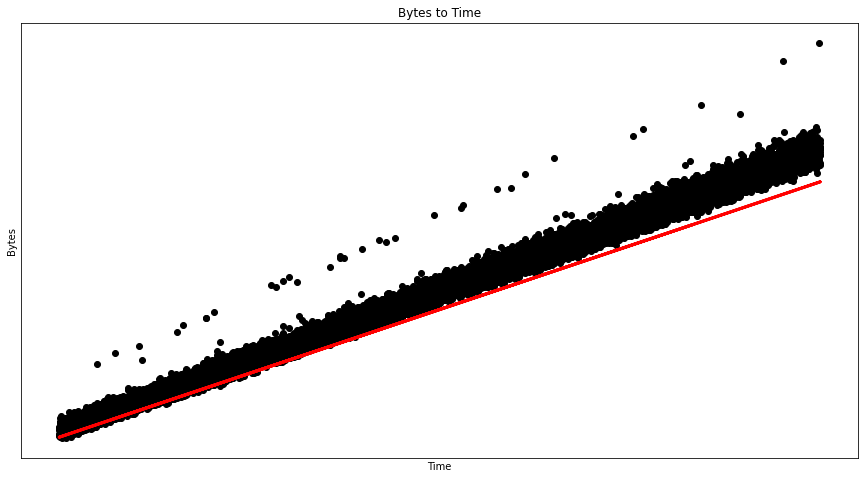

In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Plot outputs
plt.figure(figsize=(15,8))
plt.scatter(X_test, Y_test,  color='black')
plt.title('Bytes to Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.xticks(())
plt.yticks(())
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)


In [55]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [56]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
print('Coefficient is:',linear_regressor.coef_)
print('Intercept is:',linear_regressor.intercept_)
print('------------------------------')
num_data = X.shape[0]
print('num_data::',num_data)    # number of records- 4
Y_pred = linear_regressor.predict(X_test) 
mse = mean_squared_error(Y_test,Y_pred)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=linear_regressor.score(X_test,Y_test)
mae=mean_absolute_error(Y_test,Y_pred)

print('RSE=',rse)
print('R-Square=',rsquare)
print('rmse=',rmse)
print('mae=',mae)

Coefficient is: [8.45569597e-08]
Intercept is: -0.015895771820689186
------------------------------
num_data:: 10588
RSE= 0.0013925833178965543
R-Square= 0.9288075542844522
rmse= 0.0013924517870043702
mae= 0.12257439261305991


In [ ]:
# def outliers(df, feature):
#     Q1= df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     upper_limit = Q3 + 1.5 * IQR
#     lower_limit = Q1 - 1.5 * IQR
#     return upper_limit, lower_limit

# upper, lower = outliers(df, "Time")
# print("Upper whisker: ", upper)
# print("Lower Whisker: ", lower)

Upper whisker:  1.2512855
Lower Whisker:  -0.4423745


In [ ]:
# df[(df['Time'] < lower) | (df['Time'] > upper)]

,Bytes,Time


In [ ]:
# new_df = df[(df['Bytes'] > lower) & (df['Bytes'] < upper)]

In [ ]:
# def outlier_removal(df, variable):
#     upper_limit = df[variable].mean() + 3 * df[variable].std()
#     lower_limit = df[variable].mean() - 3 * df[variable].std()
#     return upper_limit, lower_limit

# upper_limit, lower_limit = outlier_removal(df, "Time")
# print("Upper limit: ", upper_limit)
# print("Lower Limit: ",lower_limit)

Upper limit:  1.1389089415690725
Lower Limit:  -0.3253348535919423


In [ ]:
# df[(df['Time'] < lower_limit) | (df['Time'] > upper_limit)]

,Bytes,Time


In [58]:
df1 = df.nlargest(round((len(df))*0.9), ['Time'])
df1

,Bytes,Time
59754,9866574,0.983776
59706,9767804,0.980035
772,9949739,0.978427
46493,9886144,0.973525
59660,9806626,0.972498
...,...,...
2464,996527,0.072087
64729,981052,0.072067
35727,1002109,0.072053
35514,996473,0.072037


In [61]:
X_train= df1.drop(['Time'], axis=1)
Y_train= df1['Time']
X_test = test.drop(['Time'], axis=1)
Y_test = test['Time']

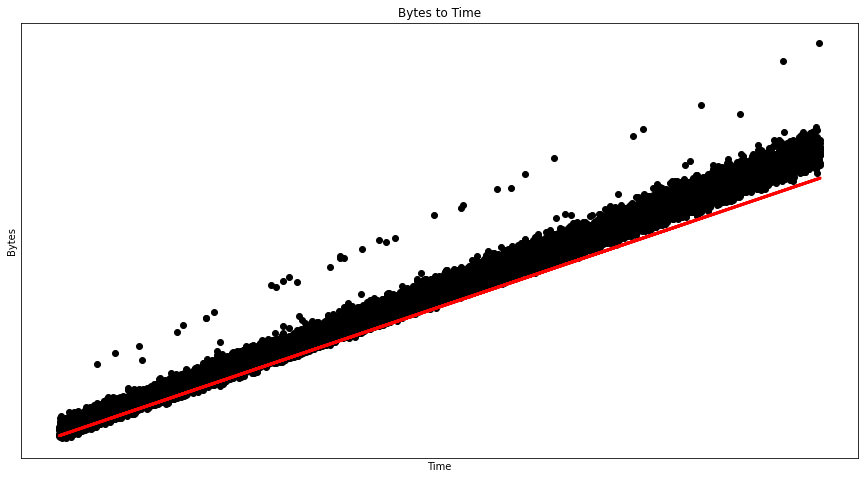

In [62]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Plot outputs
plt.figure(figsize=(15,8))
plt.scatter(X_test, Y_test,  color='black')
plt.title('Bytes to Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.xticks(())
plt.yticks(())
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)


In [63]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
print('Coefficient is:',linear_regressor.coef_)
print('Intercept is:',linear_regressor.intercept_)
print('------------------------------')
num_data = X.shape[0]
print('num_data::',num_data)    # number of records- 4
Y_pred = linear_regressor.predict(X_test) 
mse = mean_squared_error(Y_test,Y_pred)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=linear_regressor.score(X_test,Y_test)
mae=mean_absolute_error(Y_test,Y_pred)

print('RSE=',rse)
print('R-Square=',rsquare)
print('rmse=',rmse)
print('mae=',mae)

Coefficient is: [8.53100979e-08]
Intercept is: -0.021028135067254428
------------------------------
num_data:: 10588
RSE= 0.0012359162992440812
R-Square= 0.9439249518004875
rmse= 0.0012357995657090635
mae= 0.1054421590075502


In [67]:
df2 = df.nlargest(round((len(df))*0.8), ['Time'])
df2

,Bytes,Time
59754,9866574,0.983776
59706,9767804,0.980035
772,9949739,0.978427
46493,9886144,0.973525
59660,9806626,0.972498
...,...,...
25851,1986790,0.152323
42843,2007095,0.152312
70207,1935998,0.152299
19479,1949646,0.152268


In [68]:
X_train= df2.drop(['Time'], axis=1)
Y_train= df2['Time']
X_test = test.drop(['Time'], axis=1)
Y_test = test['Time']

In [69]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
print('Coefficient is:',linear_regressor.coef_)
print('Intercept is:',linear_regressor.intercept_)
print('------------------------------')
num_data = X.shape[0]
print('num_data::',num_data)    # number of records- 4
Y_pred = linear_regressor.predict(X_test) 
mse = mean_squared_error(Y_test,Y_pred)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=linear_regressor.score(X_test,Y_test)
mae=mean_absolute_error(Y_test,Y_pred)

print('RSE=',rse)
print('R-Square=',rsquare)
print('rmse=',rmse)
print('mae=',mae)

Coefficient is: [8.58540107e-08]
Intercept is: -0.024916176399909395
------------------------------
num_data:: 10588
RSE= 0.0011275056939915164
R-Square= 0.9533309432098089
rmse= 0.0011273991999469822
mae= 0.09355244579126226


In [70]:
df3 = df.nlargest(round((len(df))*0.7), ['Time'])
df3

,Bytes,Time
59754,9866574,0.983776
59706,9767804,0.980035
772,9949739,0.978427
46493,9886144,0.973525
59660,9806626,0.972498
...,...,...
24245,3011452,0.234371
5939,2915612,0.234369
3709,2990668,0.234357
43805,2918208,0.234357


In [73]:
X_train= df3.drop(['Time'], axis=1)
Y_train= df3['Time']
X_test = test.drop(['Time'], axis=1)
Y_test = test['Time']

In [74]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
print('Coefficient is:',linear_regressor.coef_)
print('Intercept is:',linear_regressor.intercept_)
print('------------------------------')
num_data = X.shape[0]
print('num_data::',num_data)    # number of records- 4
Y_pred = linear_regressor.predict(X_test) 
mse = mean_squared_error(Y_test,Y_pred)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=linear_regressor.score(X_test,Y_test)
mae=mean_absolute_error(Y_test,Y_pred)

print('RSE=',rse)
print('R-Square=',rsquare)
print('rmse=',rmse)
print('mae=',mae)

Coefficient is: [8.62937922e-08]
Intercept is: -0.02819813297866458
------------------------------
num_data:: 10588
RSE= 0.0010435227387302923
R-Square= 0.9600243651069884
rmse= 0.0010434241769601805
mae= 0.08444720445858198


In [79]:
df5 = df.nlargest(round((len(df))*0.5), ['Time'])
df5

,Bytes,Time
59754,9866574,0.983776
59706,9767804,0.980035
772,9949739,0.978427
46493,9886144,0.973525
59660,9806626,0.972498
...,...,...
31518,4931221,0.403454
7552,5055868,0.403448
11162,4931705,0.403448
39792,5047319,0.403421


In [76]:
X_train= df5.drop(['Time'], axis=1)
Y_train= df5['Time']
X_test = test.drop(['Time'], axis=1)
Y_test = test['Time']

In [77]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
print('Coefficient is:',linear_regressor.coef_)
print('Intercept is:',linear_regressor.intercept_)
print('------------------------------')
num_data = X.shape[0]
print('num_data::',num_data)    # number of records- 4
Y_pred = linear_regressor.predict(X_test) 
mse = mean_squared_error(Y_test,Y_pred)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=linear_regressor.score(X_test,Y_test)
mae=mean_absolute_error(Y_test,Y_pred)

print('RSE=',rse)
print('R-Square=',rsquare)
print('rmse=',rmse)
print('mae=',mae)

Coefficient is: [8.6868686e-08]
Intercept is: -0.032692753343908865
------------------------------
num_data:: 10588
RSE= 0.0009397260863939925
R-Square= 0.9675814115032414
rmse= 0.0009396373283218802
mae= 0.07345998273002875


In [86]:
df7 = df.nlargest(round((len(df))*0.3), ['Time'])
df7

,Bytes,Time
59754,9866574,0.983776
59706,9767804,0.980035
772,9949739,0.978427
46493,9886144,0.973525
59660,9806626,0.972498
...,...,...
27216,7110742,0.573095
1113,7070709,0.573087
45793,6829282,0.573071
39128,6984441,0.573061


In [87]:
X_train= df7.drop(['Time'], axis=1)
Y_train= df7['Time']
X_test = test.drop(['Time'], axis=1)
Y_test = test['Time']

In [88]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
print('Coefficient is:',linear_regressor.coef_)
print('Intercept is:',linear_regressor.intercept_)
print('------------------------------')
num_data = X.shape[0]
print('num_data::',num_data)    # number of records- 4
Y_pred = linear_regressor.predict(X_test) 
mse = mean_squared_error(Y_test,Y_pred)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=linear_regressor.score(X_test,Y_test)
mae=mean_absolute_error(Y_test,Y_pred)

print('RSE=',rse)
print('R-Square=',rsquare)
print('rmse=',rmse)
print('mae=',mae)

Coefficient is: [8.64822619e-08]
Intercept is: -0.028836411485649305
------------------------------
num_data:: 10588
RSE= 0.0010027568003434936
R-Square= 0.9630867088754606
rmse= 0.0010026620889571813
mae= 0.08004657072421655
